In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from scipy import stats
import pickle
import itertools
import copy

import sys
sys.path.append('../../')

from dim import utils

with open('../../dim/gen_data/dmrf_tetramer_20_4.dmrf', 'rb') as f:
    dmrfs = pickle.load(f)


plt.rcParams["font.family"] = "serif"

/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nami/anaconda3/envs/dgm/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [7]:
def get_data(seq):
    directory = os.path.expanduser('~/Volumes/blue/alberto.perezant/t.desilva/Pucker/Data/')
    data = np.loadtxt(directory+f'{seq}/pucker.dat',skiprows=1)
    data = data[:,1:]
    data = np.array([data[:, i] for i in range(18)]).T
    return(data)

directory = os.path.expanduser('~/Volumes/blue/alberto.perezant/t.desilva/Pucker/Data/')
list_labels = os.listdir(directory)
list_labels.remove('script.sh')

all_data = []
for i in list_labels:
    all_data.append(get_data(i))
    
def pucker_assign(arr):
    temp_arr = np.zeros_like(arr)
    temp_arr[:] = -1
    temp_arr[arr < 72]  = 1
    temp_arr[arr > 300] = 1
    return(temp_arr.astype(int))

pucker_all = []
for i in all_data:
    pucker_all.append(pucker_assign(i)[:,2:-2]) # remove GC terminat data
    # pucker_all[i] = pucker_all[i][:,2:-2] #

: 

In [ ]:
base_index = {}
for seq in list_labels:
    full_seq = ''.join([seq[2:],seq,seq,seq])
    for base in seq:
        indexes = [i for i, seq_base in enumerate(full_seq) if seq_base == base]
        base_index[''.join([seq,'_',base])] = indexes

In [ ]:
def get_time_in_north(arr):
    count = 0
    time_ps = []
    for i in range(0, len(arr)):
        if (arr[i] == -1):
            if count>0:
                time_ps.append(count-1)
            count = 0
        else:
            count+= 1
         
    return time_ps #returns time in north: length of array gives number of S-N transitios

def get_time_in_south(arr):
    count = 0
    time_ps = []
    for i in range(0, len(arr)):
        if (arr[i] == 1):
            if count>0:
                time_ps.append(count-1)
            count = 0
        else:
            count+= 1
         
    return time_ps #returns time in north: length of array gives number of S-N transitios

In [ ]:
# Plot S-N transitions per nano second

total_sim_time = 0
for i in pucker_all:
    total_sim_time += len(i)

total_sim_time = total_sim_time/1000 # convert time into nano seconds

time_in_north_for_individual_base = {}
time_in_south_for_individual_base = {}
sim_time_base = {'A':0,'G':0,'T':0,'C':0}

for k in base_index.keys():
    for base in 'AGTC':
        if k[5] == base:
            for i in base_index[k]:
                sim_time_base[base] = sim_time_base[base]+len(pucker_all[list_labels.index(k[:4])][i])
                try:
                    time_in_north_for_individual_base[base].extend(get_time_in_north(pucker_all[list_labels.index(k[:4])][i]))
                    time_in_south_for_individual_base[base].extend(get_time_in_south(pucker_all[list_labels.index(k[:4])][i]))
                except:
                    time_in_north_for_individual_base[base] = get_time_in_north(pucker_all[list_labels.index(k[:4])][i])
                    time_in_south_for_individual_base[base] = get_time_in_south(pucker_all[list_labels.index(k[:4])][i])

In [ ]:
pucker_fraction_ = []
for seq_no,seq in enumerate(list_labels):
    full_seq = ''.join([seq[2:],seq,seq,seq])
    dict_ = {}
    for i,base in enumerate(full_seq):
        dict_[''.join([base,str(i)])] = np.count_nonzero(pucker_all[seq_no][:,i]==1)/len(pucker_all[seq_no][:,i])
    pucker_fraction_.append(dict_)

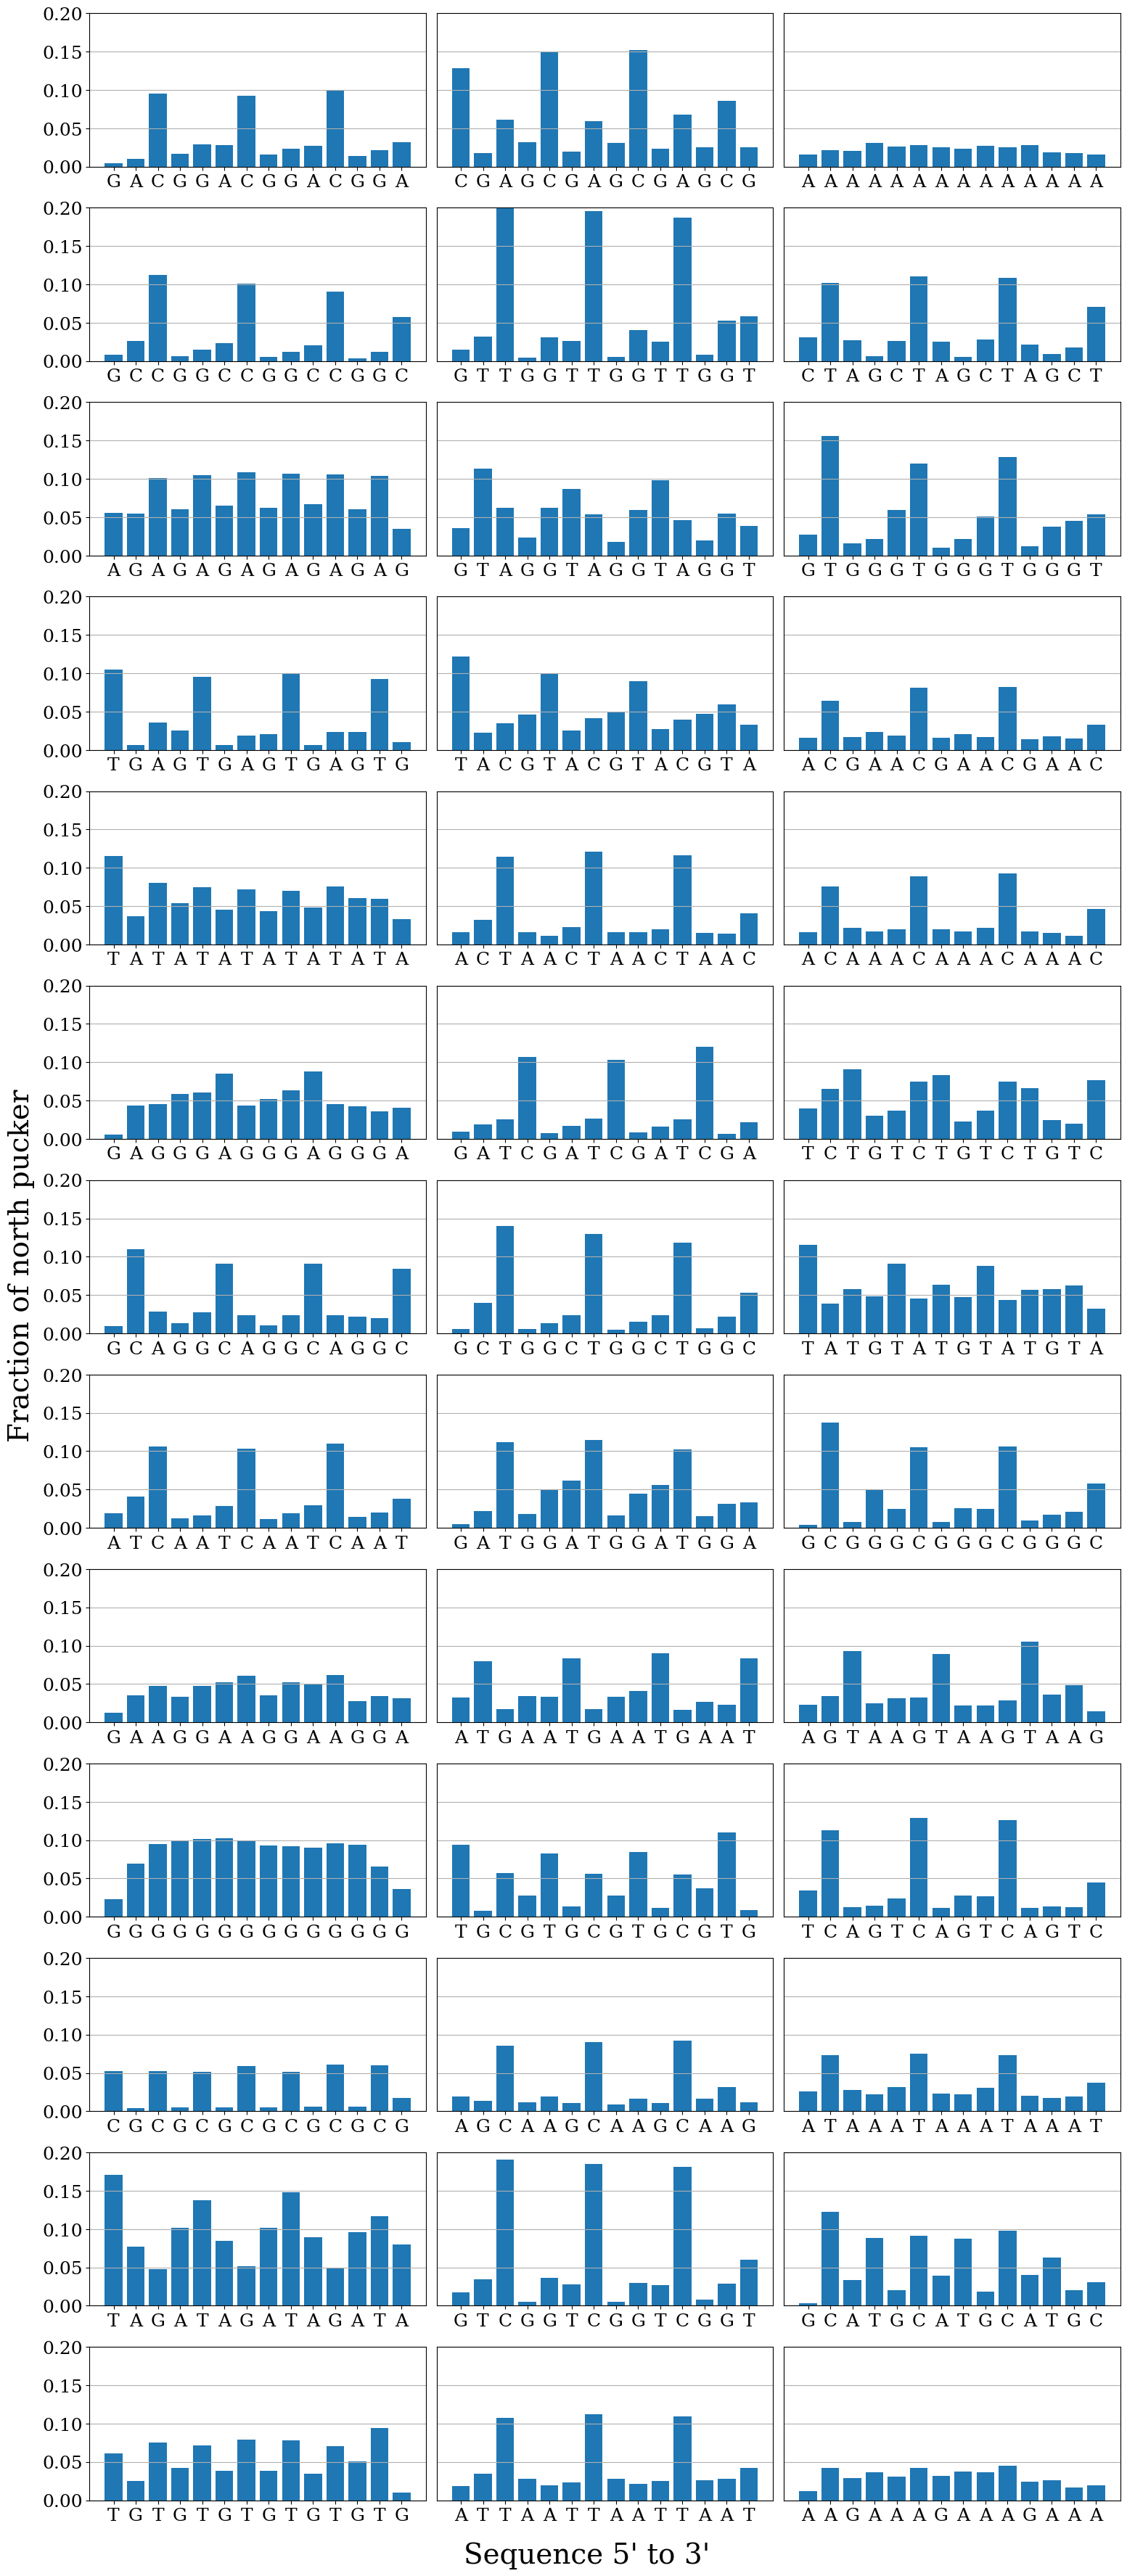

In [ ]:
fig, ax = plt.subplots(nrows=13, ncols=3, figsize=(15,35))
index = 0
for row in range(13):
    for col in range(3):
        ax[row,col].bar(range(len(pucker_fraction_[index])), 
                        list(pucker_fraction_[index].values()), align='center')
        ax[row,col].grid(axis='y')
        if col>0:
            ax[row,col].tick_params(labelleft=False, left=False)
        ax[row,col].set_xticks(range(len(pucker_fraction_[index])),
                   [i[:1] for i in list(pucker_fraction_[index].keys())])
        ax[row,col].set_ylim(0,0.2)
        ax[row,col].tick_params(axis='x', labelsize=18)
        ax[row,col].tick_params(axis='y', labelsize=18)
        
        
        index+=1
        
fig.text(0.5, -0.008, 'Sequence 5\' to 3\'', ha='center', va='center',fontsize=28)
fig.text(-0.02, 0.5, 'Fraction of north pucker', ha='center', va='center', rotation='vertical',fontsize=28)

plt.tight_layout()
plt.show()

In [ ]:
pucker_time_N = []
for seq_no,seq in enumerate(list_labels):
    full_seq = ''.join([seq[2:],seq,seq,seq])
    dict_ = {}
    for i,base in enumerate(full_seq):
        dict_[''.join([base,str(i)])] = get_time_in_north(pucker_all[seq_no][:,i])
    pucker_time_N.append(dict_)

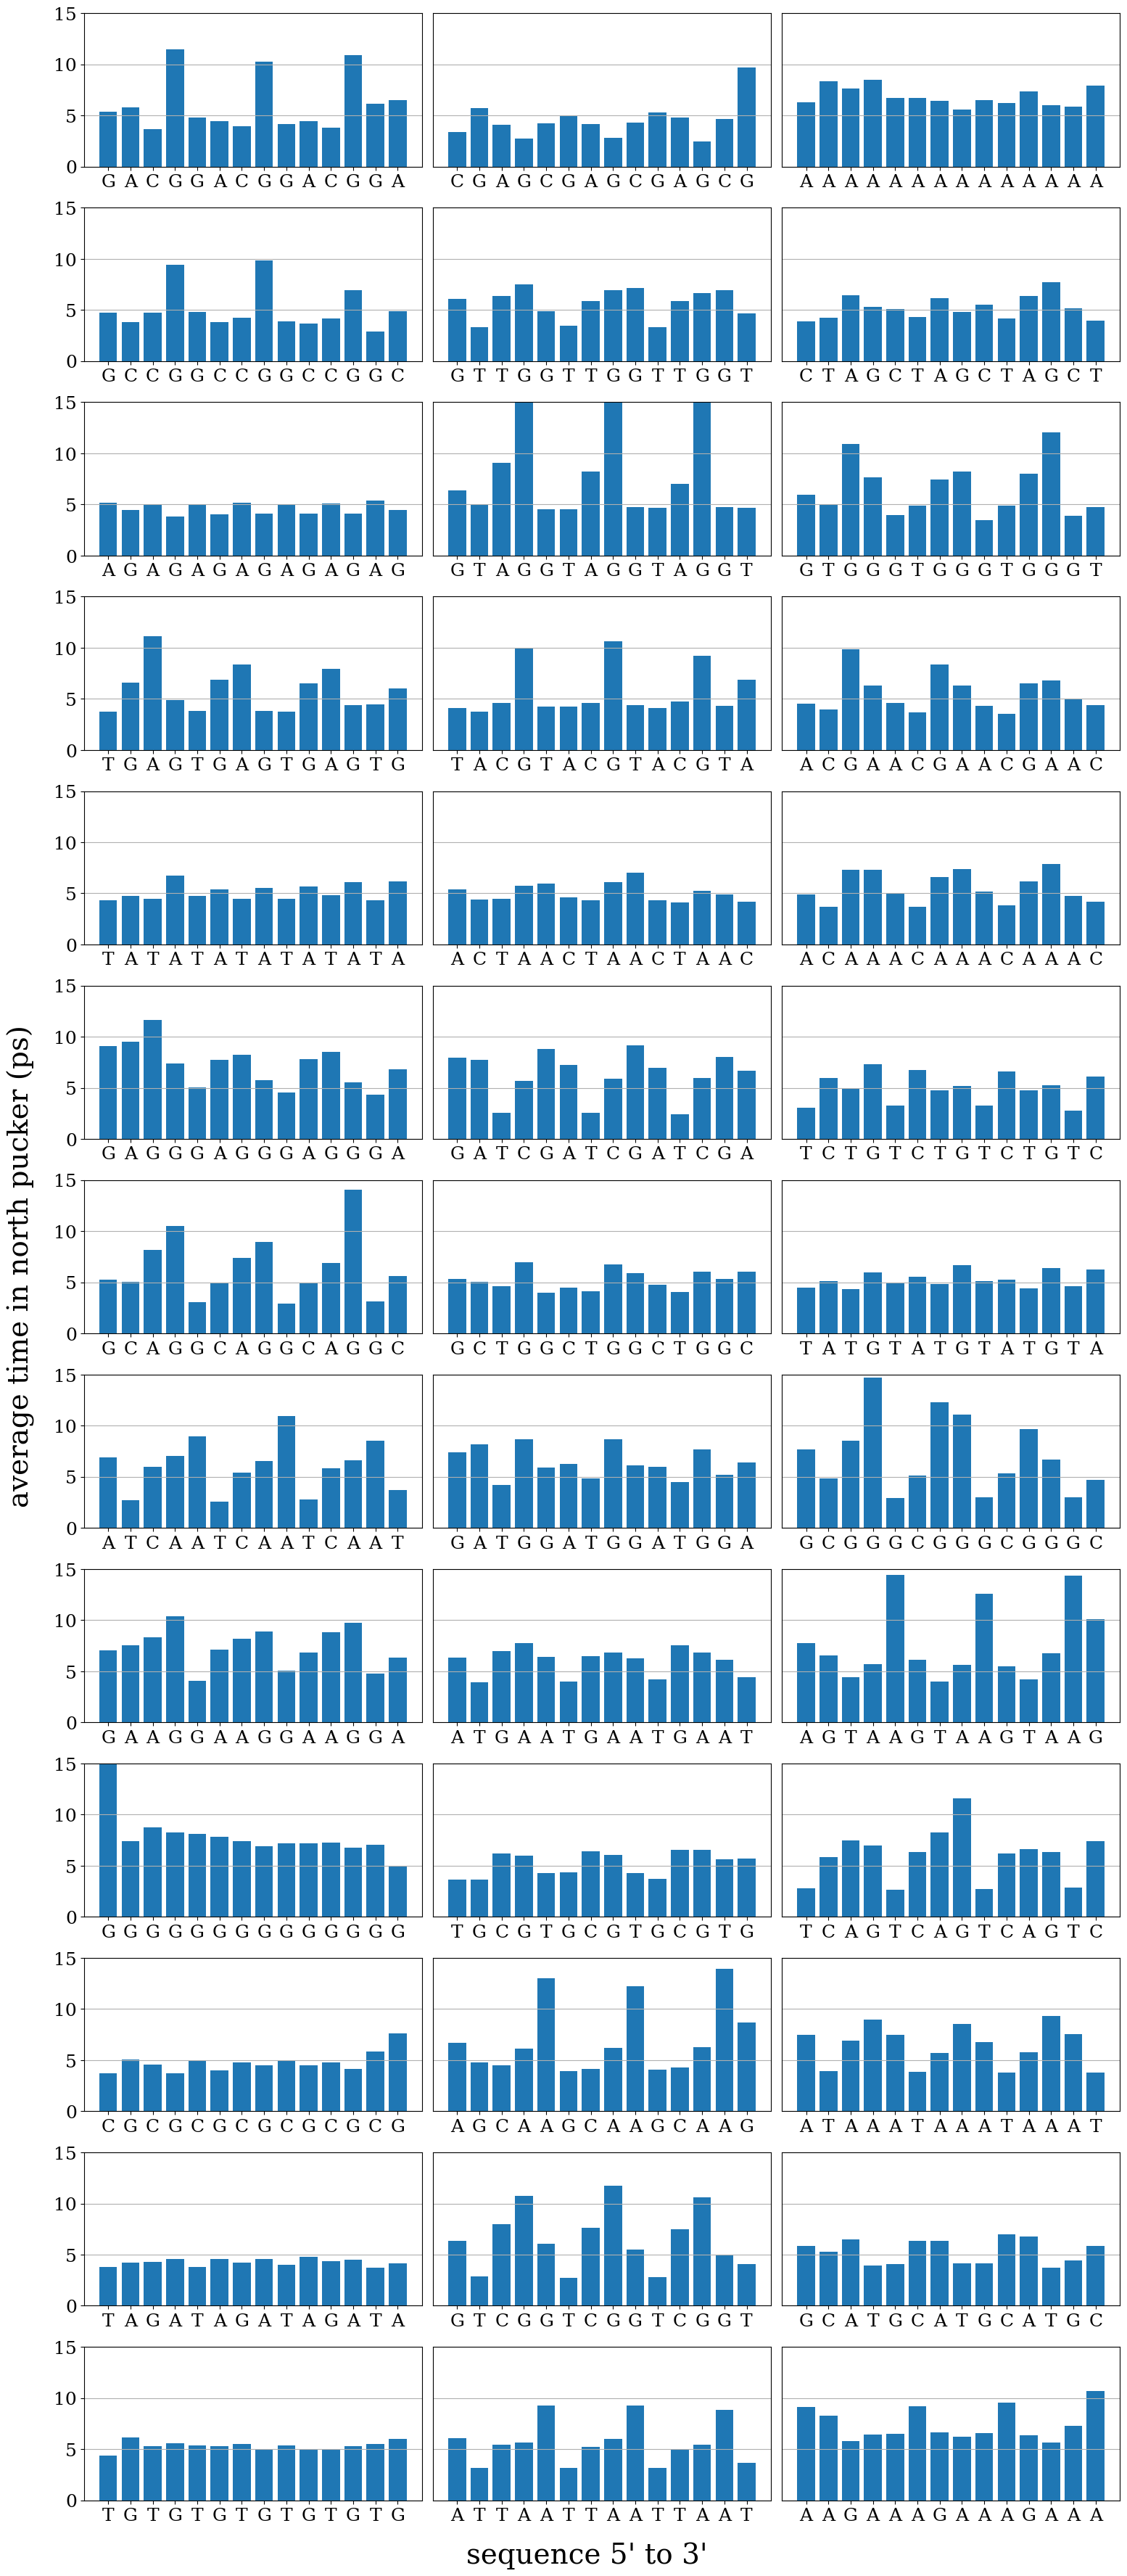

In [ ]:
fig, ax = plt.subplots(nrows=13, ncols=3, figsize=(15,35))
index = 0
for row in range(13):
    for col in range(3):
        ax[row,col].bar(range(len(pucker_time_N[index])), 
                        [np.mean(np.array(list(filter(None,i)))) for i in list(pucker_time_N[index].values())],align='center')
        ax[row,col].grid(axis='y')
        if col>0:
            ax[row,col].tick_params(labelleft=False, left=False)
        ax[row,col].set_xticks(range(len(pucker_time_N[index])),
                   [i[:1] for i in list(pucker_time_N[index].keys())])
        ax[row,col].set_ylim(0,15)
        ax[row,col].tick_params(axis='x', labelsize=18)
        ax[row,col].tick_params(axis='y', labelsize=18)
        
        
        index+=1
        
fig.text(0.5, -0.008, 'sequence 5\' to 3\'', ha='center', va='center',fontsize=28)
fig.text(-0.02, 0.5, 'average time in north pucker (ps)', ha='center', va='center', rotation='vertical',fontsize=28)

plt.tight_layout()
plt.show()

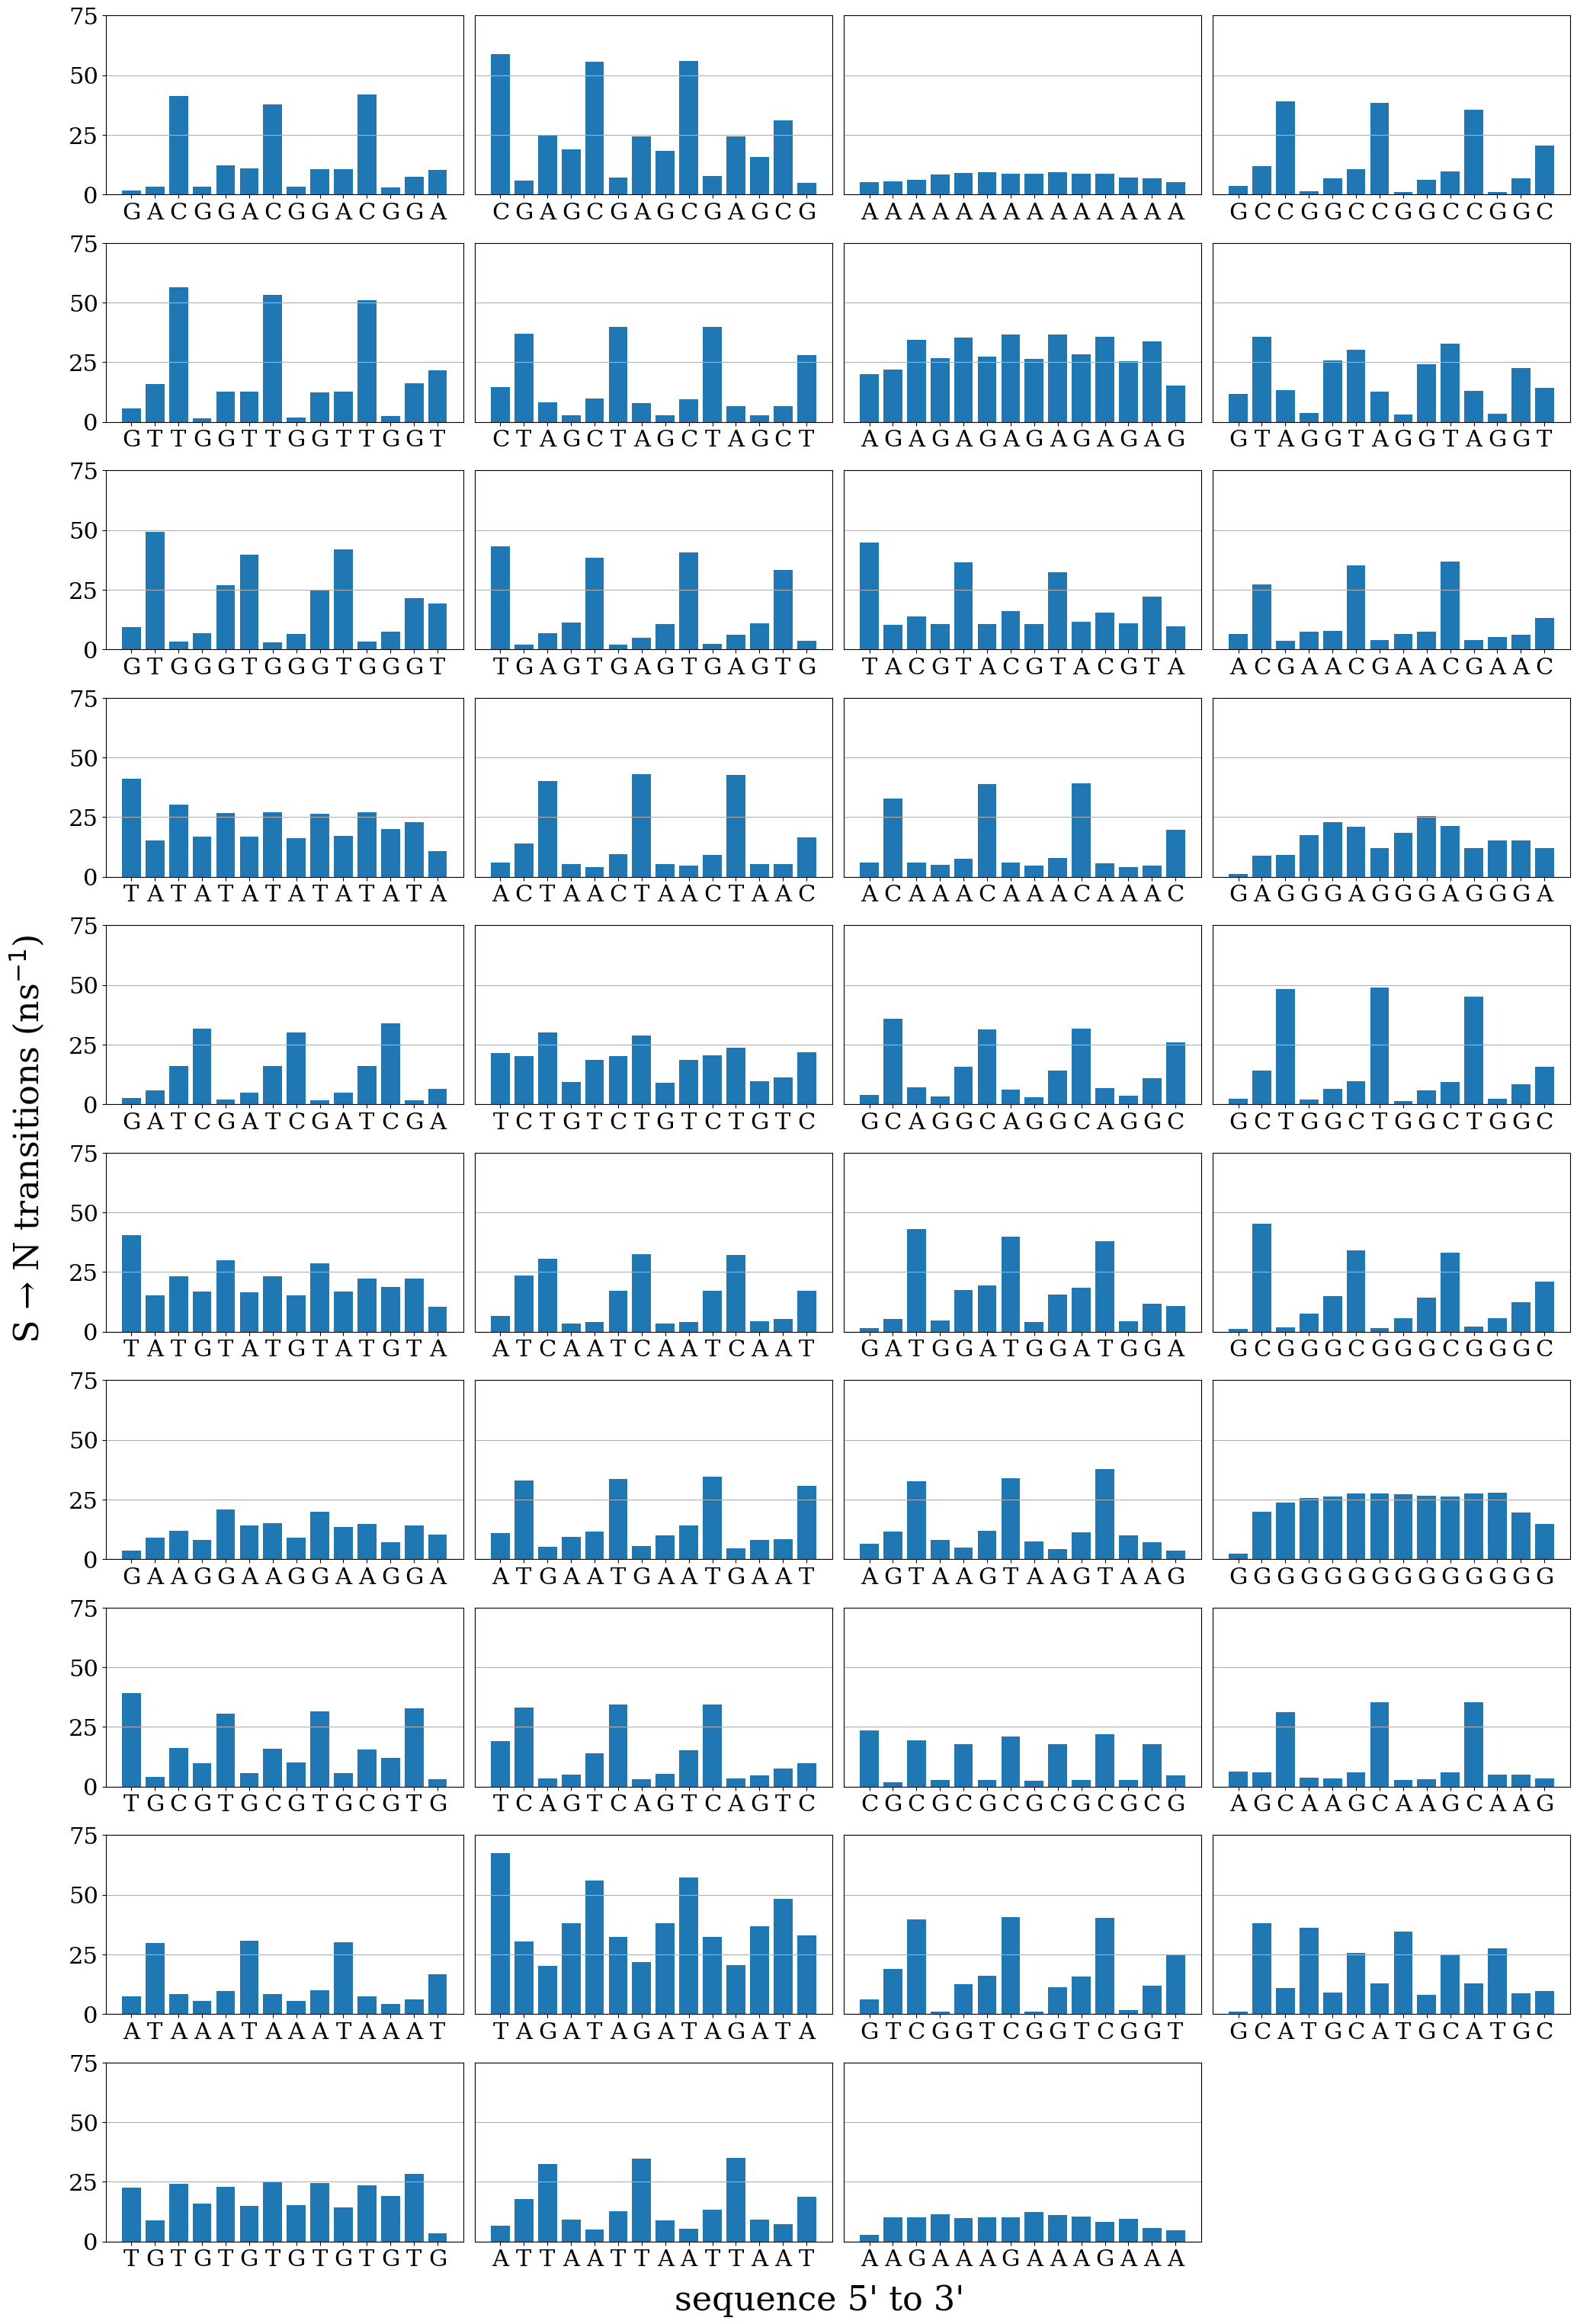

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(20,30))
index = 0
for row in range(10):
    for col in range(4):
        if row+col!=12:
            ax[row,col].bar(range(len(pucker_time_N[index])), 
                            [len(i)*1000/len(pucker_all[index]) for i in list(pucker_time_N[index].values())],align='center')
            ax[row,col].grid(axis='y')
            if col>0:
                ax[row,col].tick_params(labelleft=False, left=False)
            ax[row,col].set_xticks(range(len(pucker_time_N[index])),
                       [i[:1] for i in list(pucker_time_N[index].keys())])
            ax[row,col].set_ylim(0,75)
            ax[row,col].tick_params(axis='x', labelsize=22)
            ax[row,col].tick_params(axis='y', labelsize=22)


            index+=1

fig.text(0.5, -0.008, 'sequence 5\' to 3\'', ha='center', va='center',fontsize=32)
fig.text(-0.02, 0.5, r'S → N transitions (ns$^{-1}$)', ha='center', va='center', rotation='vertical',fontsize=32)

fig.delaxes(ax[9,3])

plt.tight_layout()

In [ ]:
A_A_coupling_neighbors = {}
for ne in [''.join([i[0],'_',i[1]]) for i in list(itertools.product('AGTC',repeat =2))]:
    A_A_coupling_neighbors[ne] = []
    
G_G_coupling_neighbors = copy.deepcopy(A_A_coupling_neighbors)
T_T_coupling_neighbors = copy.deepcopy(A_A_coupling_neighbors)
C_C_coupling_neighbors = copy.deepcopy(A_A_coupling_neighbors)
    
for seq_no,seq in enumerate(dmrfs.keys()):
    comp_seq = utils.complementary(seq)
    if seq[1] == 'A':
        for ne in A_A_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'A':
        for ne in A_A_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [A_A_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]

for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'G':
        for ne in G_G_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [G_G_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'G':
        for ne in G_G_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [G_G_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'T':
        for ne in T_T_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [T_T_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'T':
        for ne in T_T_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [T_T_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'C':
        for ne in C_C_coupling_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [C_C_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[0,0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'C':
        for ne in C_C_coupling_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [C_C_coupling_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_couplings()[1,1] for i in range(len(dmrfs[seq]))]]


In [ ]:
A_A_neighbors = {}
for ne in [''.join([i[0],'_',i[1]]) for i in list(itertools.product('AGTC',repeat =2))]:
    A_A_neighbors[ne] = []
    
G_G_neighbors = copy.deepcopy(A_A_neighbors)
T_T_neighbors = copy.deepcopy(A_A_neighbors)
C_C_neighbors = copy.deepcopy(A_A_neighbors)
    
for seq_no, seq in enumerate(list_labels):
    full_seq = seq[2:]+seq+seq+seq
    # print(full_seq)
    for i in range(len(full_seq)-2):
        if full_seq[i+1] == 'A':
            A_A_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(len(pucker_time_N[seq_no][full_seq[i+1]+str(i+1)])*1000/len(pucker_all[seq_no]))
        if full_seq[i+1] == 'T':
            T_T_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(len(pucker_time_N[seq_no][full_seq[i+1]+str(i+1)])*1000/len(pucker_all[seq_no]))
        if full_seq[i+1] == 'G':
            G_G_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(len(pucker_time_N[seq_no][full_seq[i+1]+str(i+1)])*1000/len(pucker_all[seq_no]))
        if full_seq[i+1] == 'C':
            C_C_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(len(pucker_time_N[seq_no][full_seq[i+1]+str(i+1)])*1000/len(pucker_all[seq_no]))
                

/home/t.desilva/.conda/envs/myEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/t.desilva/.conda/envs/myEnv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


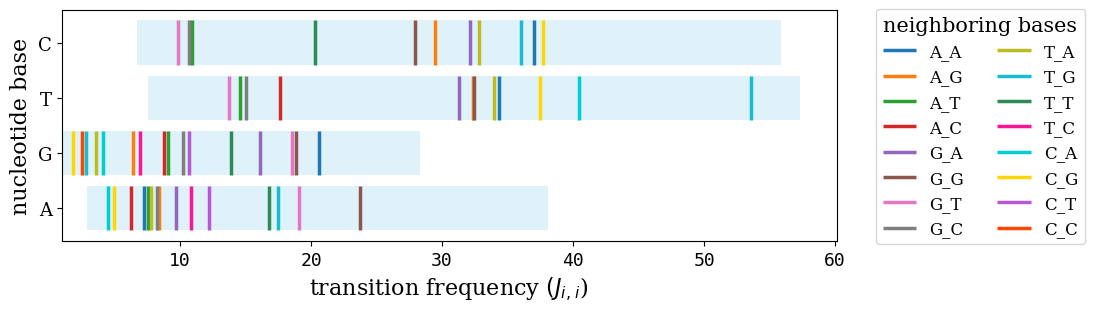

In [ ]:
# # plt.rcParams['legend.title_fontsize'] = 'xx-large'
# fig = plt.subplots(figsize=(10,3))

# # Sample data
# categories = ['A', 'G', 'T', 'C']
# bottoms = [min([item for sublist in A_A_neighbors.values() for item in sublist]),
#            min([item for sublist in G_G_neighbors.values() for item in sublist]), 
#            min([item for sublist in T_T_neighbors.values() for item in sublist]), 
#            min([item for sublist in C_C_neighbors.values() for item in sublist])]
# values = [max([item for sublist in A_A_neighbors.values() for item in sublist])-bottoms[0],
#            max([item for sublist in G_G_neighbors.values() for item in sublist])-bottoms[1], 
#            max([item for sublist in T_T_neighbors.values() for item in sublist])-bottoms[2], 
#            max([item for sublist in C_C_neighbors.values() for item in sublist])-bottoms[3]]

# # Calculate the bar lengths and y positions
# y_positions = [categories.index(category) for category in categories]

# # Create a horizontal bar chart
# plt.barh(categories, values, left=bottoms, color='skyblue', alpha=0.25)

# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#2e8b57', '#ff1493', '#00ced1', '#ffd700', '#ba55d3', '#ff4500']
# lines = []

# for color, ne in zip(colors, A_A_coupling_neighbors.keys()):
#     for category, start, value, y_position, coup in zip(categories, bottoms, values, y_positions,[A_A_neighbors,G_G_neighbors,T_T_neighbors,C_C_neighbors]):
#         avg = np.mean(coup[ne])
#         line = plt.vlines(x=avg, ymin=y_position - 0.4, ymax=y_position + 0.4, color=color, linewidth=2.5, label=ne)
#     lines.append(line)

# # Add labels and title
# plt.xlabel('transition frequency ' +  r'$(J_i$$_,$$_i$)', fontsize=16, family='serif')
# plt.ylabel('nucleotide base', fontsize=16)
# # plt.xlim(0.5,3.5)
# plt.tick_params(axis='x', labelsize=13)
# plt.xticks(fontsize=13, family='monospace')
# plt.tick_params(axis='y', labelsize=13)
# plt.legend(lines,A_A_coupling_neighbors.keys(),loc='upper left', bbox_to_anchor=(1.04, 1.04), ncol=2, 
#            fontsize=12,title = 'neighboring bases',title_fontsize=15)

# # Show the chart
# # plt.tight_layout()
# plt.show()
# # plt.savefig('images/selfCoup.png',bbox_inches="tight",dpi=300)

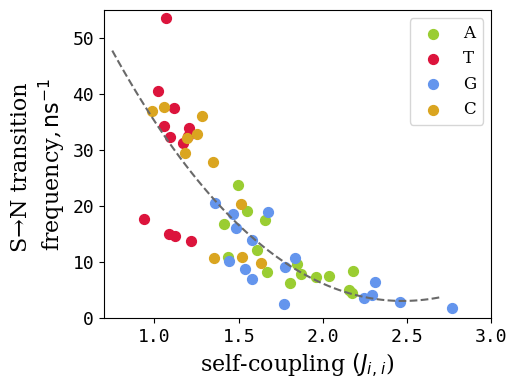

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

all_coup = list(itertools.chain(A_A_coupling_neighbors.values(), T_T_coupling_neighbors.values(),G_G_coupling_neighbors.values(),C_C_coupling_neighbors.values()))
all_coup = list(filter(lambda sublist: sublist, all_coup))
all_trans = list(itertools.chain(A_A_neighbors.values(), T_T_neighbors.values(),G_G_neighbors.values(),C_C_neighbors.values()))
all_trans = list(filter(lambda sublist: sublist, all_trans))

x = [np.mean(i) for i in all_coup]
y = [np.mean(i) for i in all_trans]

coeffs_quadratic = np.polyfit(x, y, 3)
p_quadratic = np.poly1d(coeffs_quadratic)

# Generate values for the best-fitting line
x_fit = np.linspace(0.75, 2.7, 100)
y_fit = p_quadratic(x_fit)

ax.scatter([np.mean(np.array(i)) for i in A_A_coupling_neighbors.values()],[np.mean(np.array(i)) for i in A_A_neighbors.values()], color='yellowgreen', s=50, label='A')
ax.scatter([np.mean(np.array(i)) for i in T_T_coupling_neighbors.values()],[np.mean(np.array(i)) for i in T_T_neighbors.values()], color='crimson', s=50, label='T')
ax.scatter([np.mean(np.array(i)) for i in G_G_coupling_neighbors.values()],[np.mean(np.array(i)) for i in G_G_neighbors.values()], color='cornflowerblue', s=50, label='G')
ax.scatter([np.mean(np.array(i)) for i in C_C_coupling_neighbors.values()],[np.mean(np.array(i)) for i in C_C_neighbors.values()], color='goldenrod', s=50, label='C')

ax.plot(x_fit, y_fit, color='dimgrey', linestyle='--')

ax.set_yticks(np.arange(0,55,10))
ax.set_yticklabels(np.arange(0,55,10), fontsize=13, family='monospace')
ax.set_xticks(np.arange(0.5,3.5,0.5))
ax.set_xticklabels(np.arange(0.5,3.5,0.5), fontsize=13, family='monospace')

ax.set_xlabel('self-coupling ' +  r'$(J_i$$_,$$_i$)', fontsize=16)
ax.set_ylabel('S→N transition \nfrequency,'+r'$ \, \text{ns}^{-1}$', fontsize=16)

ax.set_ylim(0,55)
ax.set_xlim(0.7,3)

ax.legend(fontsize=12)

plt.savefig("couplingVsTransitions.png", dpi=800, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
A_A_bias_neighbors = {}
for ne in [''.join([i[0],'_',i[1]]) for i in list(itertools.product('AGTC',repeat =2))]:
    A_A_bias_neighbors[ne] = []
    
G_G_bias_neighbors = copy.deepcopy(A_A_bias_neighbors)
T_T_bias_neighbors = copy.deepcopy(A_A_bias_neighbors)
C_C_bias_neighbors = copy.deepcopy(A_A_bias_neighbors)
    
for seq_no,seq in enumerate(dmrfs.keys()):
    comp_seq = utils.complementary(seq)
    if seq[1] == 'A':
        for ne in A_A_bias_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [A_A_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'A':
        for ne in A_A_bias_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [A_A_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]

for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'G':
        for ne in G_G_bias_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [G_G_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'G':
        for ne in G_G_bias_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [G_G_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'T':
        for ne in T_T_bias_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [T_T_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'T':
        for ne in T_T_bias_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [T_T_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]

                
for seq_no,seq in enumerate(dmrfs.keys()):
    if seq[1] == 'C':
        for ne in C_C_bias_neighbors:
            if seq[0]==ne[0] and seq[2]==ne[2]:
                [C_C_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[0] for i in range(len(dmrfs[seq]))]]
    if seq[2] == 'C':
        for ne in C_C_bias_neighbors:
            if seq[1]==ne[0] and seq[3]==ne[2]:
                [C_C_bias_neighbors[ne].append(j) for j in [dmrfs[seq][i].get_subsystem_biases()[1] for i in range(len(dmrfs[seq]))]]


In [ ]:
A_A_neighbors = {}
for ne in [''.join([i[0],'_',i[1]]) for i in list(itertools.product('AGTC',repeat =2))]:
    A_A_neighbors[ne] = []
    
G_G_neighbors = copy.deepcopy(A_A_neighbors)
T_T_neighbors = copy.deepcopy(A_A_neighbors)
C_C_neighbors = copy.deepcopy(A_A_neighbors)

for seq_no, seq in enumerate(list_labels):
    full_seq = seq[2:]+seq+seq+seq
    for i in range(len(full_seq)-2):
        if full_seq[i+1] == 'A':
            A_A_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(pucker_fraction_[seq_no][full_seq[i+1]+str(i+1)])
        if full_seq[i+1] == 'T':
            T_T_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(pucker_fraction_[seq_no][full_seq[i+1]+str(i+1)])
        if full_seq[i+1] == 'G':
            G_G_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(pucker_fraction_[seq_no][full_seq[i+1]+str(i+1)])
        if full_seq[i+1] == 'C':
            C_C_neighbors[full_seq[i]+'_'+full_seq[i+2]].append(pucker_fraction_[seq_no][full_seq[i+1]+str(i+1)])
        

/home/t.desilva/.conda/envs/myEnv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/t.desilva/.conda/envs/myEnv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


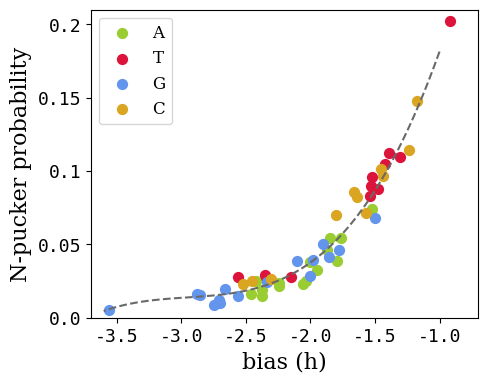

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))

all_coup = list(itertools.chain(A_A_bias_neighbors.values(), T_T_bias_neighbors.values(),G_G_bias_neighbors.values(),C_C_bias_neighbors.values()))
all_coup = list(filter(lambda sublist: sublist, all_coup))
all_trans = list(itertools.chain(A_A_neighbors.values(), T_T_neighbors.values(),G_G_neighbors.values(),C_C_neighbors.values()))
all_trans = list(filter(lambda sublist: sublist, all_trans))

x = [np.mean(i) for i in all_coup]
y = [np.mean(i) for i in all_trans]

coeffs_quadratic = np.polyfit(x, y, 3)
p_quadratic = np.poly1d(coeffs_quadratic)

# Generate values for the best-fitting line
x_fit = np.linspace(-1, -3.6, 100)
y_fit = p_quadratic(x_fit)

ax.scatter([np.mean(np.array(i)) for i in A_A_bias_neighbors.values()],[np.mean(np.array(i)) for i in A_A_neighbors.values()], color='yellowgreen', s=50, label='A')
ax.scatter([np.mean(np.array(i)) for i in T_T_bias_neighbors.values()],[np.mean(np.array(i)) for i in T_T_neighbors.values()], color='crimson', s=50, label='T')
ax.scatter([np.mean(np.array(i)) for i in G_G_bias_neighbors.values()],[np.mean(np.array(i)) for i in G_G_neighbors.values()], color='cornflowerblue', s=50, label='G')
ax.scatter([np.mean(np.array(i)) for i in C_C_bias_neighbors.values()],[np.mean(np.array(i)) for i in C_C_neighbors.values()], color='goldenrod', s=50, label='C')

ax.plot(x_fit, y_fit, color='dimgrey', linestyle='--')

ax.set_yticks(np.arange(0,0.21,0.05))
ax.set_yticklabels(np.round(np.arange(0,0.21,0.05),2), fontsize=13, family='monospace')
ax.set_xticks(np.arange(-3.5,-0.7,0.5))
ax.set_xticklabels(np.round(np.arange(-3.5,-0.7,0.5), 1), fontsize=13, family='monospace')

ax.set_xlabel('bias (h)', fontsize=16)
ax.set_ylabel('N-pucker probability', fontsize=16)

ax.set_ylim(0,0.21)
ax.set_xlim(-3.7,-0.7)

ax.legend(fontsize=12)

# plt.savefig("biasVsProbability.png", dpi=800, bbox_inches='tight', transparent=True)
plt.show()